# Car auction price estimation

## Introduction

This notebook describes an estimation of car auction bid prices for auctions on the car dealer site KVD https://www.kvd.se/auktion/personbil

Auction data is extracted from the KVD site using the GitHub project at https://github.com/fredriksoderberg/auction-analysis/tree/master/auction_data  

### Data cleaning

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
#import numpy as np
#from sklearn.metrics import mean_squared_error
%matplotlib inline

C:\Users\frsod\AppData\Local\Continuum\Anaconda3\lib\site-packages\pandas\computation\__init__.py:19: UserWarning: The installed version of numexpr 2.4.4 is not supported in pandas and will be not be used

  UserWarning)


In [2]:
data = pd.read_csv('kvd_auction_20160404.csv', index_col = 0)

Extract data subset (highest bid, estimated action price) 

In [3]:
datasubset = data[['highest_bid', 'estimated_auction_price']]

Remove non digits from price data.

In [4]:
datasubset = datasubset.replace(to_replace=r'[a-z.]|[A-Z]| ', value=r'', regex=True)

Remove rows with empty data.

In [5]:
datasubset.dropna()
datasubset = datasubset[datasubset.estimated_auction_price != '']

Extraction of estimated auction price ranges.

In [6]:
datasubset['est_auction_price_low'] = datasubset['estimated_auction_price'].str.split('-').str[0]
datasubset['est_auction_price_high'] = datasubset['estimated_auction_price'].str.split('-').str[1]

Cast to integer datatype 

In [7]:
datasubset['highest_bid'] = datasubset['highest_bid'].astype(int)
datasubset['est_auction_price_low'] = datasubset['est_auction_price_low'].astype(int)
datasubset['est_auction_price_high'] = datasubset['est_auction_price_high'].astype(int)

### Accuracy of estimated auction prices

Calculate average estimated auction prices

In [8]:
datasubset['avg_est_auction_price'] = datasubset[['est_auction_price_low', 'est_auction_price_high']].mean(axis=1)

Calculate average deviation from (avg) estimated auction price. Get the mean over all auctions.

In [9]:
datasubset['est_auction_price_error'] = \
datasubset['highest_bid'].sub(datasubset['avg_est_auction_price'], axis=0).div(datasubset['avg_est_auction_price'], axis=0).abs()
datasubset['est_auction_price_error'].mean()

0.08683623661995511

Plot

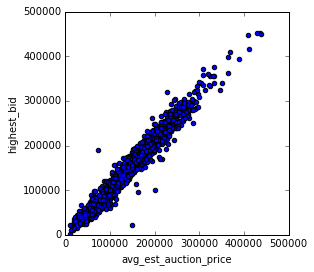

In [58]:
ax = datasubset.plot(kind='scatter', x='avg_est_auction_price', y='highest_bid', figsize=(4,4))
ax.set_xlim(0, 500000)
ax.set_ylim(0, 500000);

Calculate percentage of auction prices within the estimated range

In [11]:
nr_within_range = len(datasubset[(datasubset['highest_bid'] > datasubset['est_auction_price_low']) &  \
                             (datasubset['highest_bid'] < datasubset['est_auction_price_high'])])
total_nr_of_auctions = len(datasubset)
nr_within_range / total_nr_of_auctions

0.7438898450946644

### Data visualization

Top 10 auction winners

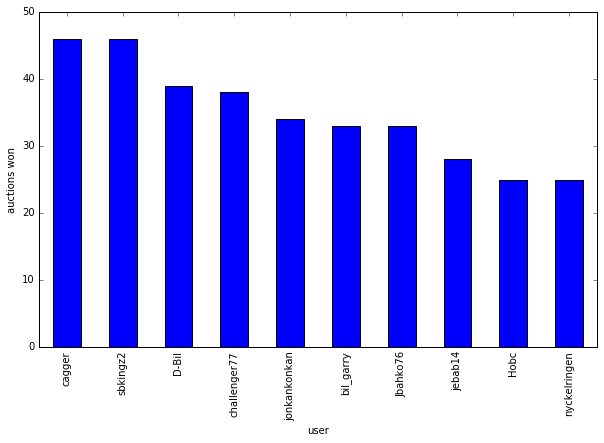

In [57]:
datasubset['bidder'] = data['bidder']
nr_of_bids_by_bidder = datasubset.groupby(['bidder']).size() 
nr_of_bids_by_bidder = nr_of_bids_by_bidder[nr_of_bids_by_bidder.ix[:,] > 5] 
nr_of_bids_by_bidder.sort_values(ascending=False, inplace=True)
nr_of_bids_by_bidder = nr_of_bids_by_bidder.head(10)
ax = nr_of_bids_by_bidder.plot(kind='bar', figsize=(10,6))
ax.set_ylabel('auctions won')
ax.set_xlabel('user');

Auctions by place of sale

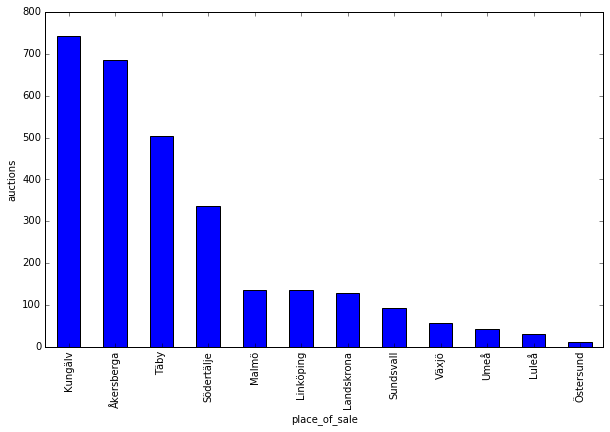

In [56]:
datasubset['place_of_sale'] = data['place_of_sale']
auctions_by_place_of_sale = datasubset.groupby(['place_of_sale']).size()
auctions_by_place_of_sale.sort_values(ascending = False, inplace=True)
ax = auctions_by_place_of_sale.plot(kind='bar', figsize=(10,6))
ax.set_ylabel('auctions');

Most active auction weekdays 

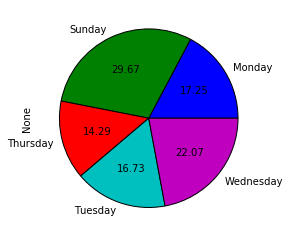

In [55]:
datasubset['auction_date'] = pd.to_datetime(data['auction_date'], errors='coerce')
datasubset['auction_weekday'] = datasubset['auction_date'].dt.dayofweek
days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday', 5:'Saturday', 6:'Sunday'}
datasubset['auction_weekday'].replace(days, inplace=True)
auction_date_weekday = datasubset.groupby(['auction_weekday']).size()
auction_date_weekday =  auction_date_weekday / len(datasubset)
auction_date_weekday.plot.pie(figsize=(4,4), autopct='%.2f');

Most popular car models

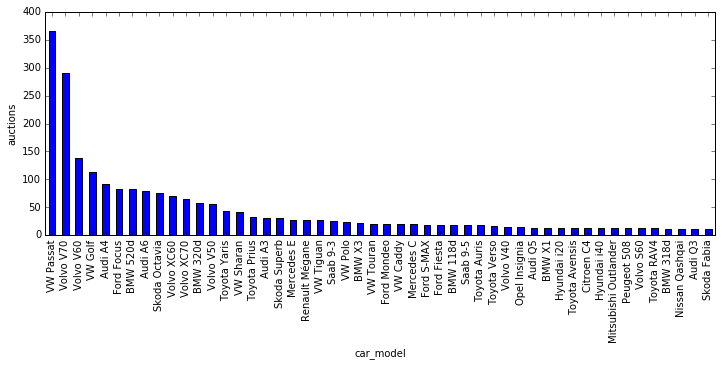

In [53]:
datasubset['car_model'] = data['car_model']
car_model_count = datasubset.groupby(['car_model']).size()
car_model_count = car_model_count[car_model_count.ix[:,] > 10]
car_model_count.sort_values(ascending=False, inplace=True)
ax = car_model_count.plot(kind='bar', figsize=(12,4))
ax.set_ylabel('auctions');

Histogram of highest bid per model year for car model "VW Passat" 

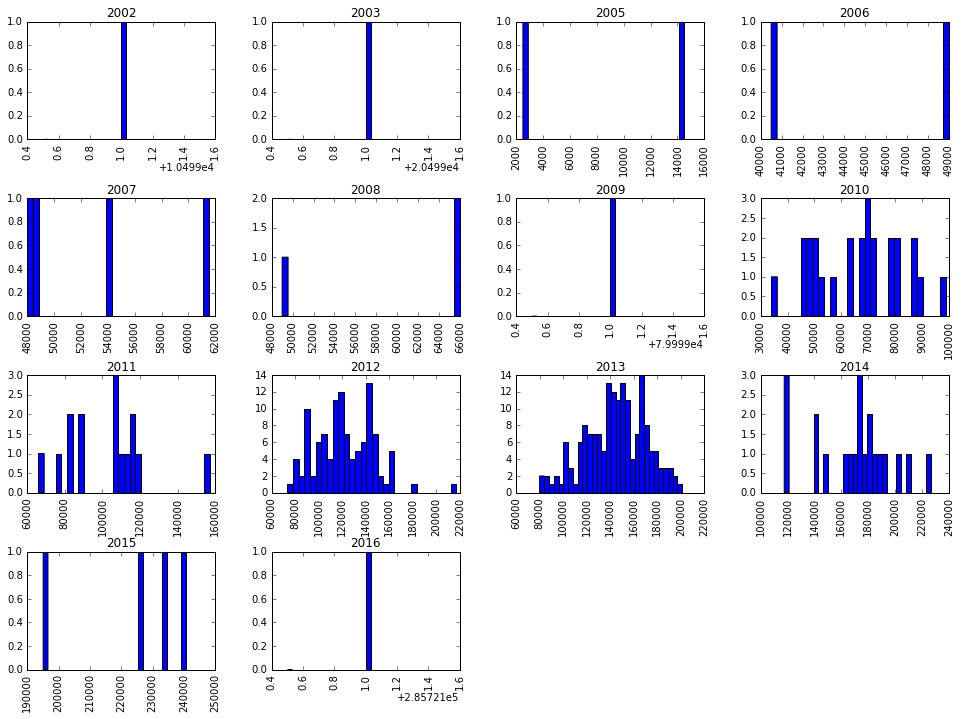

In [60]:
datasubset['model_year'] = data['model_year']
auctions_passat = datasubset[(datasubset['car_model'] == 'VW Passat')]
auctions_passat['highest_bid'].hist(by=auctions_passat['model_year'], figsize=(16,12), bins=30);

In [67]:
datasubset['milage'] = data['milage']
datasubset['milage'] = datasubset['milage'].replace(to_replace=r'[a-z.]|[A-Z]| ', value=r'', regex=True)
datasubset['milage'].astype(int)
#auctions_passat_2013 = datasubset[datasubset[(['model_year'] == 2013) & (['car_model'] == 'VW Passat')]
#auctions_passat_2013.head()
#auctions_passat_2013['highest_bid'].hist(by=auctions_passat_2013['milage'], figsize=(16, 6), bins=30)

object_number
713531    22815
711281     7090
713373    12225
708665        0
712178    18914
714671    13223
710486     9428
710670    14477
714774    16945
714441    12028
714444    13255
714442    13723
712075    14224
712184    18513
711282     4465
714197     9057
714200    11717
711678     5386
715004     9890
711542     7709
714946     4829
712152     4660
713132    18205
713350    12952
713480    15334
713559    14873
700874    24261
711892    13411
714621     8820
713961     1802
          ...  
705941    24423
706494     7192
707754    17270
707574     7050
707374    17805
707928     7443
705635     2086
706936    13522
707193     1789
707036    12766
706712    13276
707351     6479
707158     7543
707988     5360
708302     9515
705349     9197
667783    14408
707153    10242
707867    10468
707593    13493
706502    12754
707455    12985
706681     9338
708363    15181
707137     4017
709353    14031
707674     7535
707661    15688
708398    13368
708728    10219
Name: mila

In [34]:
datasubset['milage'] = data['milage']
datasubset['milage'] = datasubset['milage'].replace(to_replace=r'[a-z.]|[A-Z]| ', value=r'', regex=True)
dt = datasubset[['car_model', 'model_year', 'milage']]
dt = dt['car_model'].groupby(dt['car_model']).size()
dt.describe()

count    256.000000
mean      11.347656
std       33.543654
min        1.000000
25%        1.000000
50%        3.000000
75%        9.000000
max      365.000000
dtype: float64